In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

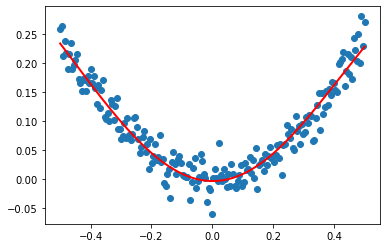

In [4]:
# 使用numpy生成200个随机点，转化成维度（200行一列）
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)#生成随机值，正态分布
y_data = np.square(x_data) + noise

## 定义两个placeholder占位符（n行1列的矩阵,和样例相同）
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间层
#一个输入，中间层10个神经原
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))  # 1行10列的随机数
biases_L1 = tf.Variable(tf.zeros([1, 10]))  # 偏置b
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1  # 线性变换
#注：基于python的广播机制，上面biases_L1与前面矩阵行数不同也可加
L1 = tf.nn.tanh(Wx_plus_b_L1)  # 激活函数tanh  

# 定义神经网络输出层
#中间层10个神经原，一个输出
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))#这里为什么是1，1？
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
predict = tf.nn.tanh(Wx_plus_b_L2)#输出

# 二次代价函数（损失函数）
loss = tf.reduce_mean(tf.square(y - predict))  # 标签值和预测值的差的平方作为代价

# 梯度下降算法训练器，学习率0.1
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)  

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    # 训练2000次
    for _ in range(2000):
        sess.run(train, feed_dict={x: x_data, y: y_data})

    # 获得预测值
    predict_value = sess.run(predict, feed_dict={x: x_data})
    
    #画图
    plt.figure()
    # 离散点
    plt.scatter(x_data, y_data)
    # 连续预测值
    plt.plot(x_data, predict_value, 'r-', lw=2)
    plt.show()